In [1]:
import pandas as pd
import numpy as np
import csv
import copy
from collections import defaultdict

In [2]:
#Import all the data

#Households data
vehicle_make_big_data = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_vehicles.csv', encoding = "ISO-8859-1")

#Vehicle trip data
vgps_trips_big_data = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")

In [3]:
vehicle_make_info = vehicle_make_big_data[['sampno', 'vehno', 'veh_make']]
vehicle_make_info

,sampno,vehno,veh_make
0,7156986,2,51
1,7156986,3,17
2,7157693,1,20
3,7158808,1,13
4,7158808,2,13
5,7158870,1,51
6,7158870,2,52
7,7159089,1,50
8,7159089,2,35
9,7160186,1,34


In [4]:
vgps_trips = vgps_trips_big_data[['sampno', 'vehno']]
vgps_trips.head(5)

,sampno,vehno
0,1776019,2
1,2759536,2
2,2055542,1
3,2556033,1
4,2759536,1


In [5]:
d = defaultdict(lambda: defaultdict(int))
d

defaultdict(<function __main__.<lambda>()>, {})

In [6]:
for row in vehicle_make_info.values:
    sampno = row[0]
    vehno = row[1]
    vehMake = row[2]
    
    d[sampno][vehno] = vehMake
    
d

defaultdict(<function __main__.<lambda>()>,
            {7156986: defaultdict(int, {2: 51, 3: 17, 1: 50}),
             7157693: defaultdict(int, {1: 20}),
             7158808: defaultdict(int, {1: 13, 2: 13}),
             7158870: defaultdict(int, {1: 51, 2: 52}),
             7159089: defaultdict(int, {1: 50, 2: 35}),
             7160186: defaultdict(int, {1: 34, 2: 33}),
             7163193: defaultdict(int, {1: 24, 2: 24}),
             7163480: defaultdict(int, {1: 50, 2: 33}),
             7163555: defaultdict(int, {1: 51}),
             7163889: defaultdict(int, {1: 16, 2: 33, 3: 16, 4: 50}),
             7164822: defaultdict(int, {1: 52, 2: 12}),
             7165540: defaultdict(int, {1: 45, 2: 52}),
             7168791: defaultdict(int, {1: 36, 2: 12, 3: 35}),
             7168963: defaultdict(int, {1: 50, 2: 33, 3: 39}),
             7169214: defaultdict(int, {1: 50, 2: 24}),
             7169686: defaultdict(int, {1: 50, 2: 17, 3: 50}),
             7169816: defaultdic

In [7]:
count = defaultdict(int)

In [8]:
for trip in vgps_trips.values:
    trip_sampno = trip[0]
    trip_vehno = trip[1]
    
    trip_vehMake_x = d[trip_sampno][trip_vehno]
    
    if count[trip_vehMake_x] == 0:
        count[trip_vehMake_x] = 1
        
    elif count[trip_vehMake_x] != 0:
        count[trip_vehMake_x] += 1

In [9]:
count

defaultdict(int,
            {19: 878,
             50: 4640,
             17: 361,
             22: 562,
             13: 268,
             24: 2731,
             33: 277,
             26: 382,
             38: 182,
             16: 1310,
             20: 1843,
             12: 100,
             30: 351,
             0: 82,
             36: 275,
             39: 1115,
             48: 381,
             46: 229,
             40: 34,
             52: 259,
             43: 70,
             15: 184,
             51: 564,
             47: 62,
             34: 129,
             97: 53,
             32: 265,
             11: 222,
             35: 491,
             37: 74,
             28: 54,
             49: 96,
             14: 226,
             41: 15,
             27: 106,
             42: 121,
             21: 29,
             54: 18,
             56: 20,
             25: 16})

In [10]:
#turn a dictionary into a dataframe
count_df = pd.DataFrame(list(count.items()), columns=['vehicle_make', 'count'])
count_df

,vehicle_make,count
0,19,878
1,50,4640
2,17,361
3,22,562
4,13,268
5,24,2731
6,33,277
7,26,382
8,38,182
9,16,1310


In [16]:
Y = count_df.sort_values("count").groupby("vehicle_make", as_index=False).first()
Y

,vehicle_make,count
0,0,82
1,11,222
2,12,100
3,13,268
4,14,226
5,15,184
6,16,1310
7,17,361
8,19,878
9,20,1843


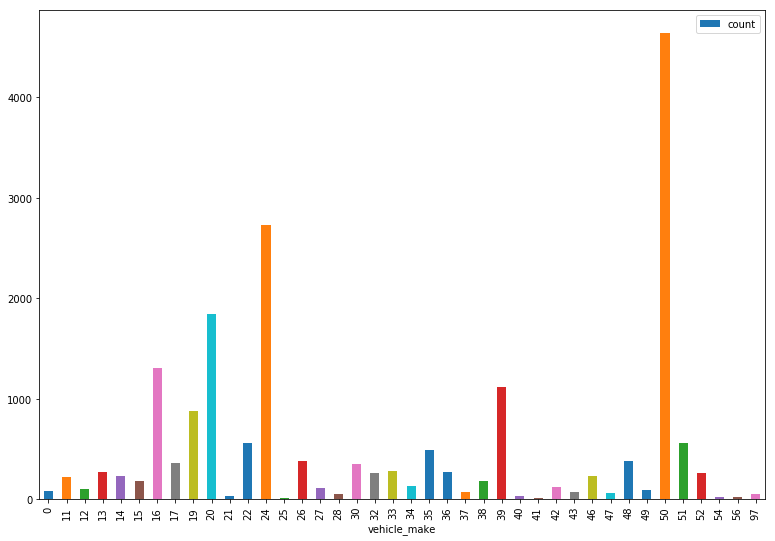

In [22]:
Y.plot(x='vehicle_make', y='count',kind='bar', figsize=(13,9))